In [11]:
import datetime, time
import netCDF4
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
% matplotlib inline

In [30]:
def func(name):
    nc = netCDF4.Dataset('E:/Validatiecase TEXEL data/{}.nc'.format(name))

    x_domain = (0, -1)  # general-waddden sea (250, 380)
    y_domain = (0, -1)  # (530,760)

    h = nc.variables["SEP"][:, :, :]
    x = nc.variables["x"][:, :]
    y = nc.variables["y"][:, :]
    t = nc.variables["time"][:]
    t = t * 60
    x = x[x_domain[0] : x_domain[1], y_domain[0] : y_domain[1]]
    y = y[x_domain[0] : x_domain[1], y_domain[0] : y_domain[1]]
    h = h[:, x_domain[0] : x_domain[1], y_domain[0] : y_domain[1]]
    
    return x,y,t,h

class flow_zuno():  # testcasae with rotating flow with tidal component
    def __init__(self): 
        number_downloads = 1
        t0 = '08/05/2018 06:00:00'
        t0 = datetime.datetime.strptime(t0, "%d/%m/%Y %H:%M:%S").timestamp()
        names = []
        for i in range(number_downloads):
            ana = datetime.datetime.fromtimestamp(t0+i*60*60*6).strftime('%Y%m%d%H%M')
            names.append(ana)
        
        x,y,t,h = func(names[0])
        for i in range(1, len(names)):
            _,_,t1,h1 = func(names[i])        
            t = np.concatenate((t,t1), axis = 0)
            h = np.concatenate((h,h1), axis = 0)
        
        self.h = h
        self.x = x
        self.y = y
        self.t = t

f = flow_zuno()

(48, 58)

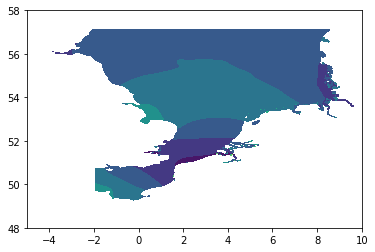

In [31]:
plt.contourf(f.x,f.y,f.h[0,:,:])
plt.xlim(-5,10)
plt.ylim(48,58)

<IPython.core.display.Javascript object>


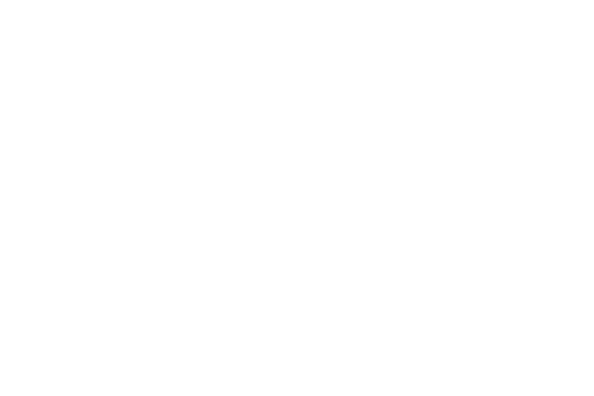

<IPython.core.display.Javascript object>


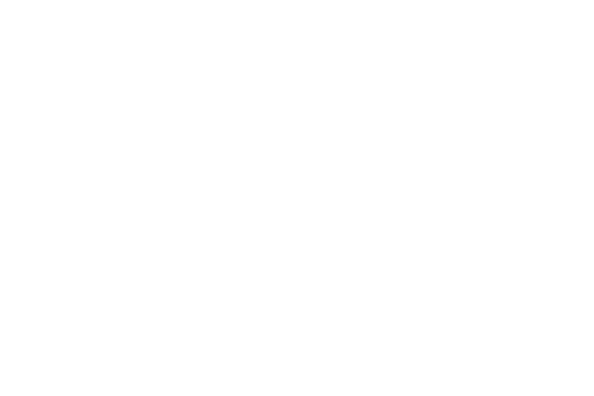

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [5]:
import matplotlib.animation as animation
% matplotlib notebook

fig = plt.figure(figsize=(7.5,5))
ax = plt.subplot()
ax.axis('equal')

plt.xlim(-5,10)
plt.ylim(48,58)

a = 2

q = plt.contourf(f.x,
               f.y,
               f.h[0]
          )


def update_line(i, q):
    QQ = 10
    i = i*1
    Q = int((i)/(len(f.t[:])))
    i = i - Q * (len(f.t[:]))
    plt.title(np.round((f.t[i] - f.t[0])/ 3600 ,1) )
    
    q = plt.contourf(f.x,
               f.y,
               f.h[i]
          )

    
ani = animation.FuncAnimation(fig, 
                              update_line,
                              len(f.t) - 11,
                              fargs=[q], 
                              interval=20,
                              repeat = True
                             )

# ani.save('gif{}.gif'.format(int(time.time())))

In [6]:
f.h.shape

(36, 637, 1433)